In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import imageio
from skimage.transform import rescale, resize, downscale_local_mean
from scipy.ndimage import binary_erosion, binary_opening
import pandas as pd
import sys
import skimage
sys.path.append("../../")
from VoltageIntensityClass import VoltageIntensity
%matplotlib inline
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from alienlab.regression_func import residuals, exp_decay, regression_affine, regression_linear, get_affine_func, get_polyfit_func
from alienlab.plot import PlotFigure

import scipy 

p = PlotFigure()
p.fonttick = 15
p.fontsize=17
p.figsize=(10,10)
p.save_folder = "G:/DREAM/from_github/thesis/Intensity_paper/"
plt.rc('legend', fontsize=15)
p.extension = ".pdf"
p.date=False


from scipy.fftpack import fft2
from scipy.fftpack import ifft2

from numpy.fft import fftshift, ifftshift

from scipy.fftpack import fft2 as fft
from numpy.fft import fftshift, ifftshift



import alienlab.utils

In [2]:

def dict_to_func(dict_amplitude):
    x = []
    y = []
    for k in dict_amplitude.keys():
        x.append(k)
        y.append(dict_amplitude[k])
    x = np.array(x)
    y = np.array(y)
    func = get_affine_func(x, y)
    return func
    
def amp_to_eins(dict_amplitude, amplitude, lbd):
    #ref: https://fr.wikipedia.org/wiki/Einstein_(unit%C3%A9_de_mesure)
    func = dict_to_func(dict_amplitude)
    power = func(amplitude)
    eins=power*1e-3*1e3*lbd/120/S
    
    return eins

In [3]:
folder_mother = "./friday/"# "./wednesday/"
folder_RED = glob.glob(folder_mother + "/*autofocus_RED")[0]
print(folder_RED)

folder_BLUE = glob.glob(folder_mother + "/*autofocus_BLUE")[0]
#print(folder_BLUE)

folder_GREEN = glob.glob(folder_mother + "/*autofocus_GREEN")[0]
print(folder_GREEN)

folder_PURPLE = glob.glob(folder_mother + "/*autofocus_PURPLE")[0]
print(folder_PURPLE)

folder_DRONPA = glob.glob(folder_mother + "/*_calib_video*")[0]
print(folder_DRONPA)

./friday\2022-08-05_16_17_autofocus_RED
./friday\2022-08-05_15_49_autofocus_GREEN
./friday\2022-08-05_15_53_autofocus_PURPLE
./friday\2022-08-03_19_02_D2_calib_video


## Dronpa2 calibration

7797.636583874761


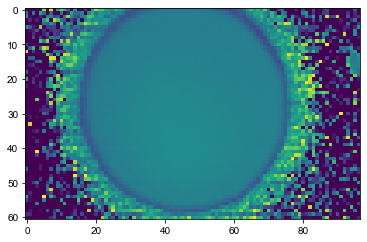

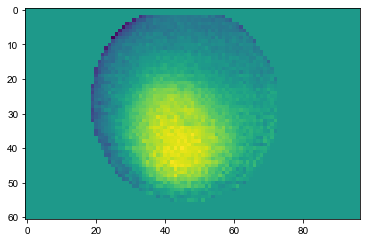

In [4]:
I_480 = np.load(glob.glob(folder_DRONPA + "/*I_480.npy")[0])
plt.imshow(I_480)
plt.figure()
np.median(I_480)
reader = imageio.get_reader(glob.glob(folder_DRONPA + "/video.tiff")[0])
im_read =  reader.get_data(10)
mask_full =im_read>4
mask = downscale_local_mean(mask_full, (10, 10))
mask = mask>0.5
mask = binary_erosion(mask, iterations= 2)
v = I_480*mask
v[v==0]=np.quantile(v, 0.75)
plt.imshow(v)
 
dronpa_480 = np.mean(I_480[mask]) 
print(dronpa_480)

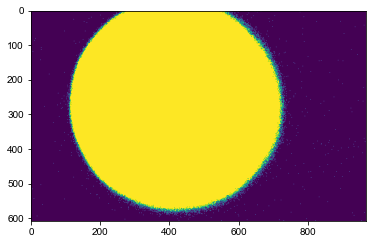

In [5]:
images = np.load(glob.glob(folder_RED + "/*images*")[0])
im_ref = images[-1]
mask = im_ref>1
plt.imshow(mask)

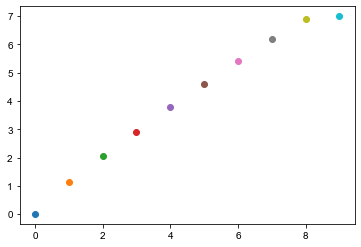

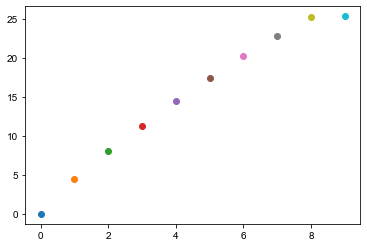

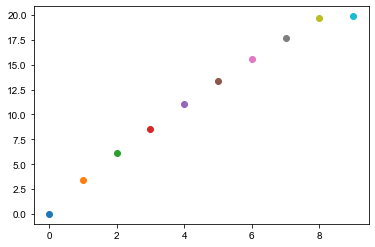

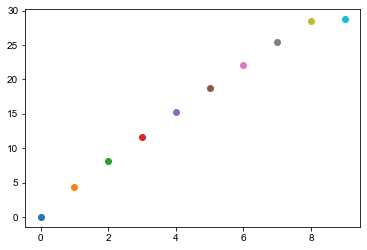

In [6]:
folder_list = [folder_PURPLE,
               folder_BLUE, 
               folder_GREEN, 
               folder_RED
              ]

blue= 470
red = 640
green=550
purple = 405

colors = [purple, blue, green, red]
mean_dict = {}
for c in colors:
    mean_dict[c] = []

for j,folder in enumerate(folder_list):
    images = np.load(glob.glob(folder + "/*images*")[0])
    plt.figure()
    for i, im in enumerate(images):
        m = np.mean(im[mask])
        plt.scatter(i, m)
        mean_dict[colors[j]].append(m)


# LED spectrum

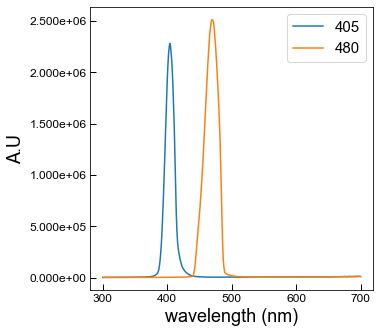

In [7]:
headers, spectrum = alienlab.utils.pandas_to_arrays("LEDs.csv")
p.xlabel  = "wavelength (nm)"
p.ylabel= "A.U"
fig = p.set_figure("%d")

for i in range(len(headers)//2):
    plt.plot(spectrum[i*2], spectrum[i*2+1], label =  headers[2*i+1])
plt.legend()

Fitted mean =  403.9903915739245
Fitted standard deviation =  6.6665566251310615


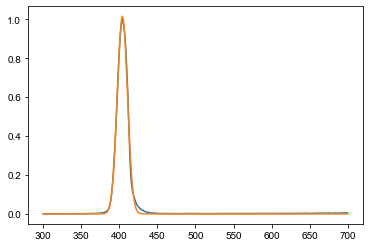

In [8]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


hist = spectrum[1]/spectrum[1].max()
bin_centres = spectrum[0]

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 400., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])

plt.show()

# DDAO spectrum

g:\dream\from_github\alienlab\alienlab\utils.py:79: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file, skiprows=skiprows, skipfooter=skipfooter)


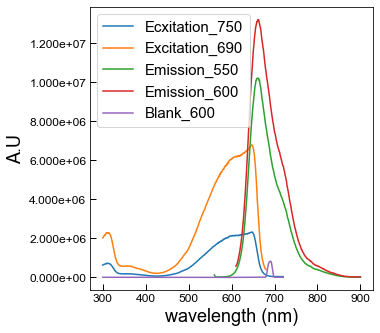

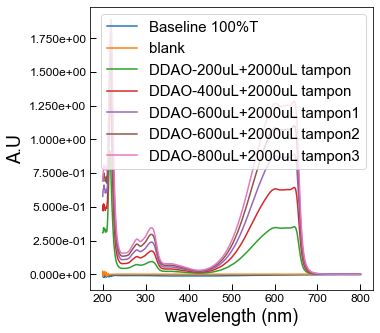

In [9]:
fluo_headers, fluo_spectrum = alienlab.utils.pandas_to_arrays("fluo_CSV_01_08_2022.csv")
fig = p.set_figure("%d")
for i in range(len(fluo_headers)//2):
    plt.plot(fluo_spectrum[i*2], fluo_spectrum[i*2+1], label =  fluo_headers[2*i+1])
plt.legend()

abs_headers, abs_spectrum = alienlab.utils.pandas_to_arrays("ddao_01_08_2022.csv", skiprows=[1], skipfooter=280)
fig = p.set_figure("%d")
for i in range(len(abs_headers)//2):
    plt.plot(abs_spectrum[i*2], abs_spectrum[i*2+1], label =  abs_headers[2*i])
plt.legend()

In [10]:
(600*100)/2600

23.076923076923077

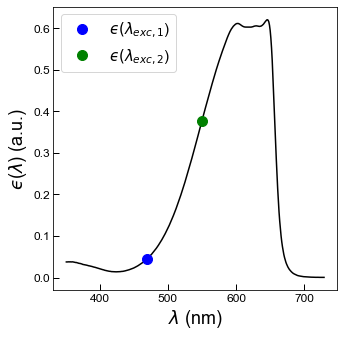

In [11]:


p.xlabel = r'$\lambda$ (nm)'
p.ylabel = r'$ϵ$($\lambda$) (a.u.)'
fig = p.set_figure(formatx = "%d", formaty = "%0.1f")

x = abs_spectrum[10]
y = abs_spectrum[11]/abs_spectrum[11].max()

ind = (x>350) * (x<730)
x = x[ind]
y=y[ind]

plt.plot(x, y, "k")#, label = 'normalized excitation spectrum')

def gaussian(x, mu, sig):
    return np.exp(-(x - mu)**2 / (2 * sig**2))

plt.plot(470, y[x==470], "ob", markersize=10, label = r"$ϵ(\lambda_{exc,1}$)")
plt.plot(550, y[x==550], "og", markersize=10,label = r"$ϵ(\lambda_{exc,2}$)")

plt.legend()
#p.save_name = "excitation_DDAO_read_690"
#p.saving(fig)



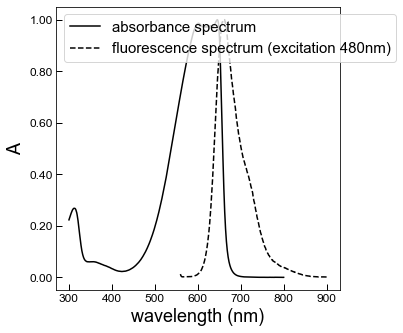

In [12]:
p.xlabel = 'wavelength (nm)'
p.ylabel = 'A'
fig = p.set_figure(formatx = "%d", formaty = "%0.2f")


absorbance = abs_spectrum[13]-abs_spectrum[3]
wavelength = abs_spectrum[0]
ind = wavelength>300
x = wavelength[ind]
y = absorbance[ind]
plt.plot(x, y/y.max(), "k", label = 'absorbance spectrum')

wavelength = fluo_spectrum[4]
fluo = fluo_spectrum[5]

plt.plot(wavelength, fluo/fluo.max(), "k", linestyle="--", label = 'fluorescence spectrum (excitation 480nm)')

plt.legend(loc = "upper left")
#plt.savefig("images/absorbance_fluorescence_DDAO_015uM" + extension)

In [13]:
voltages = np.load(glob.glob(folder_BLUE + "/voltage.npy")[0])



#550
dict_powermeter = {}
dict_powermeter[green] = {
    0: 0,
    55:13.5,
    111:18.5,
    166:23.5,
    222:27.5,
    277:32,
    333:35,
    388:37,
    444:42,}


#640
dict_powermeter[red] = {
    0: 0,
    55:10,
    111:14,
    166:18,
    222:21,
    277:24,
    333:28,
    388:31,
    444:34,}

#480
dict_powermeter[blue] = {
    0: 0,
    55:81,
    111:141,
    166:200,
    222:258,
    277:308,
    333:355,
    388:404,
    444:445,}

dict_powermeter[purple] = {
    0: 0,
    55:57,
    111:111,
    166:162,
    222:215,
    277:266,
    333:315,
    388:362,
    444:408,}

val_mppc = {}
for c in colors:
    S = 0.28
    dic = dict_powermeter[c]
    val_mppc[c] = amp_to_eins(dic, voltages[:-1], c)


./friday\2022-08-05_16_17_autofocus_RED
./friday\2022-08-05_15_49_autofocus_GREEN
./friday\2022-08-05_15_53_autofocus_PURPLE
./friday\2022-08-03_19_02_D2_calib_video
[  85.70523869  490.53560067  916.19789745 1358.32762092 1812.7372331
 2275.41616611 2742.53082221 3210.42457377 3675.61776329 4134.80770338]
[  41.40617831  947.47079739 1746.85037486 2547.0311103  3354.31245377
 4154.97458593 4944.26614388 5714.5505584  6472.31097409 7228.98296015]
[  5.69112821 101.28564601 186.75720982 272.97677572 359.99896441
 447.24172956 535.53304373 623.66238137 712.64396714 798.9326306 ]
[  3.47231246  81.47519836 155.1342255  232.25949368 312.52235758
 394.7142489  478.94711503 563.67634699 649.52761523 726.33462504]
[]
./wednesday\2022-08-10_16_09_autofocus_RED
./wednesday\2022-08-10_15_59_autofocus_GREEN
./wednesday\2022-08-10_15_55_autofocus_PURPLE
./wednesday\2022-08-10_15_06_D2_calib_video
[-149.65101718  426.49017096  980.02996259 1511.41380035 2021.07284764
 2509.42398868 2976.86982843 34

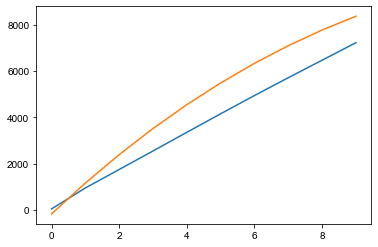

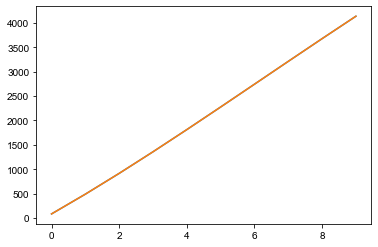

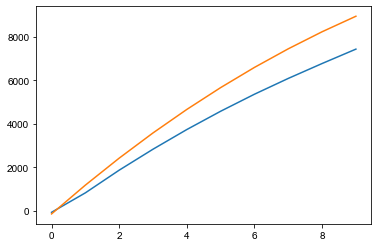

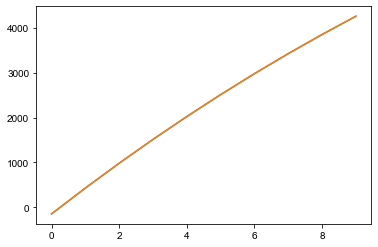

In [14]:
folder_mother_list = ["./friday/", "./wednesday/"]
                 

blues = [[],[]]
purples = [[],[]]
color_intensity = [{},{}]

for k, folder_mother in enumerate(folder_mother_list):   
    
    folder_RED = glob.glob(folder_mother + "/*autofocus_RED")[0]
    print(folder_RED)

    folder_BLUE = glob.glob(folder_mother + "/*autofocus_BLUE")[0]
    #print(folder_BLUE)

    folder_GREEN = glob.glob(folder_mother + "/*autofocus_GREEN")[0]
    print(folder_GREEN)

    folder_PURPLE = glob.glob(folder_mother + "/*autofocus_PURPLE")[0]
    print(folder_PURPLE)

    folder_DRONPA = glob.glob(folder_mother + "/*_calib_video*")[0]
    print(folder_DRONPA)




    V = VoltageIntensity(folder = glob.glob(folder_mother + "*_bode_diagram*")[0])


    for i in range(10):
        intensity_blue = V.get_intensity_voltage("blue", 0, voltages[i]/100)*1e6# * dronpa_480 / ( V.get_intensity_voltage("blue", 0, 400/100))
        blues[k].append(intensity_blue)
        intensity_purple = V.get_intensity_voltage("purple", 0, voltages[i]/100)*1e6
        purples[k].append(intensity_purple)
    blues[k] = np.array(blues[k])
    purples[k] = np.array(purples[k])

    V.get_intensity_voltage("purple", 0, 2.5)*1e6


    ref = purple
    dl = 10

    for c in colors: 
        fluo = np.array(fluo_spectrum[1])
        wavelength = fluo_spectrum[0]
        exc_base = np.mean(fluo[(wavelength>ref-dl)*(wavelength<ref+dl)])
        exc_color = np.mean(fluo[(wavelength>c-dl)*(wavelength<c+dl)])
        color_intensity[k][c] = purples[k] * mean_dict[c]/mean_dict[ref] * exc_base/exc_color
        print(color_intensity[k][c])
    color_intensity

    plt.figure()
    plt.plot(color_intensity[k][blue])
    plt.plot(blues[k])
    plt.figure()
    plt.plot(color_intensity[k][purple])
    plt.plot(purples[k])

    print((blues[-1]-color_intensity[k][blue][-1])/color_intensity[k][blue][-1]*100)

In [15]:
i

9

29.802818421690745
30.270599143457584
29.586404707701707
28.750397668204464
27.978196648429943
27.340172000818875
26.863217263981827
14.894654091482662
7.075744187154251
3.756246724422311
1.719843251164777
0.5887990707781192
0.03822845728658727
-0.031867932399179254
46.05255931616233
29.313117093248625
19.867845117158698
13.692692777499307
9.385939949376354
6.050532057494355
3.5290943117617837
48.90049202087896
33.555007727199026
24.47119939382882
18.09022652242975
13.359702873615674
9.56635055243874
6.621234386379725


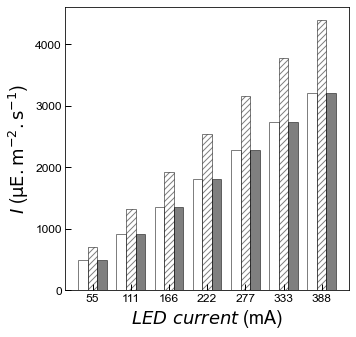

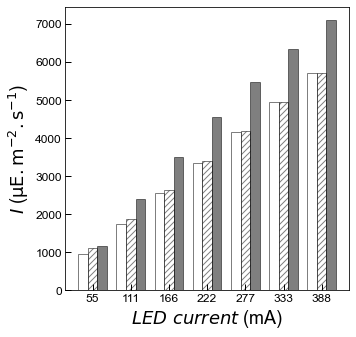

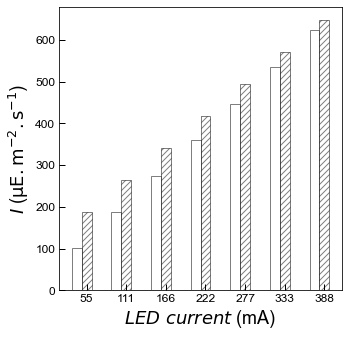

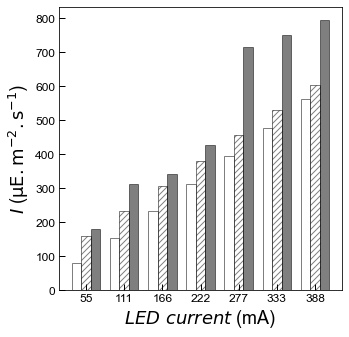

In [20]:
dasa_values = np.load("DASA_values.npy")

w = 0.25

fill =  ["",  "////" , "\\\\" , "...." , "xxxx", "oooo", "O"]

for k in colors:
    fig = p.set_figure("%d", "%d")
    #plt.bar(0, 0)
    for i, val in enumerate(color_intensity[0][k][1:-2]):
        j=i
        plt.bar(j-w,  val, align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "white", label = "DDAO read out", hatch = fill[0], edgecolor = "k")
        #plt.bar(i+w,  color_intensity[1][k][i+1], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "blue", label = "DDAO read out")

        plt.bar(j,  val_mppc[k][i+1], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "white", label = "Powermeter read out", hatch = fill[1], edgecolor = "k")

        plt.xlabel("$LED \ current$ (mA)")
        plt.ylabel(p.label_intensity)
        if k==405:
            plt.bar(j+w,  purples[0][i+1], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "k", label = "Dronpa 2 prediction", hatch = fill[0], edgecolor = "k")
        if k==470:
            plt.bar(j+w,  blues[0][i+1], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "k", label = "Dronpa 2 prediction",  hatch = fill[0], edgecolor = "k")
        if k==640:
            plt.bar(j+w,  dasa_values[i], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "k", label = "DASA1 prediction", hatch = fill[0], edgecolor = "k")

        #if i==0:
         #   plt.legend(prop ={"size":13})
        ax = plt.gca()    
        ax.set_xticks(np.linspace(0, 6, 7))
        ax.set_xticklabels(voltages[1:-2].astype(int))

        print((val_mppc[k][i+1]-val)/val_mppc[k][i+1]*100)
        plt.savefig("images/compare_DDAO_LED_%d.pdf"%k)
        

## experimental details

Dissolve in minimal quantity of DMSO (Two-photon Uncaging Acridinone Live-cell (SI)) then in Phosphate Buffer 
(100mM NaCl, 5mM NaOH, 10mM HEPES)
Absorbance max for 15µM: 0.15  
Emission spectrum collected for 15µM solution emission: 690 nm, 8nm width
DDAO and Dronpa sample for video: double glass slide with double-sided tape


Video:  
- Dronpa excited at 480nm to recover the *dispersion of intensity of blue LED spot*   
- DDAO excited at 480nm to recover the *transfert function* of the instrument and to recover the *mean fluorescence intensity from blue excitation* 10 levels of intensity.   
- DDAO excited at 650nm filter 640/20nm dichroic 665nm. From mean fluo level of blue and red excitation, and excitation spectrum: we recover the level of the blue LED. From image: we recover the dispersion of intensity.

## BLUE

7411.671266390035


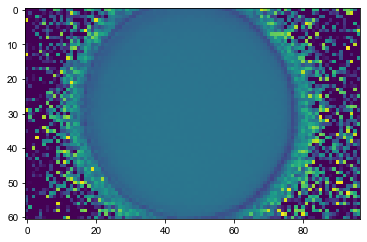

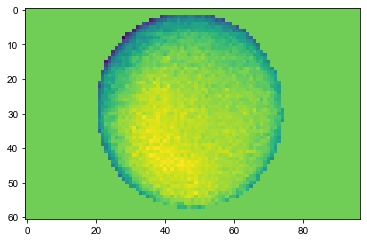

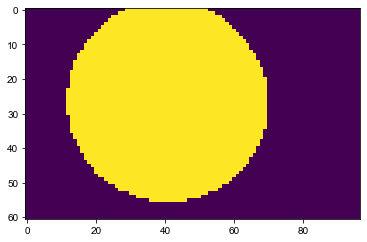

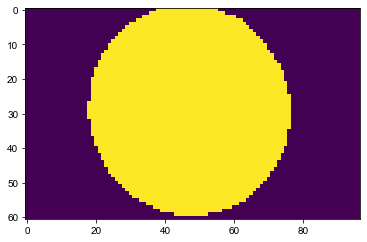

In [17]:
I_480 = np.load(glob.glob(folder_DRONPA + "/*I_480.npy")[0])
plt.imshow(I_480)
plt.figure()
np.median(I_480)
reader = imageio.get_reader(glob.glob(folder_DRONPA + "/video.tiff")[0])
im_read =  reader.get_data(10)
mask_full =im_read>4
mask = downscale_local_mean(mask_full, (10, 10))
mask = mask>0.5
mask = binary_erosion(mask, iterations= 2)
v = I_480*mask
v[v==0]=np.quantile(v, 0.75)
plt.imshow(v)
 
dronpa_480 = np.mean(I_480[mask]) 
print(dronpa_480)

def max_dist(I):
    X = ndi.distance_transform_edt(I)
    x0, y0 = np.unravel_index(X.argmax(), X.shape)
    d0 = np.max(X)
    return x0, y0, d0
    
    
im = images[-1]
im = downscale_local_mean(im, (10, 10))
im_ref = downscale_local_mean(im_read, (10, 10))
plt.figure()
v = 3
plt.imshow(im>v)
plt.figure()
plt.imshow(im_ref>4)

n=20
im2 = np.copy(im)
im2[im2>n] = n

#shift, error, diffphase = skimage.registration.phase_cross_correlation(im_ref, im, upsample_factor=100)

x0, y0, d0 = max_dist(im>v) #1
x1, y1, d1 = max_dist(im_ref>4)

shift = [y1 - y0, x1 - x0]
tform = skimage.transform.AffineTransform(translation = shift)

I_480_t = skimage.transform.warp(I_480, tform)

## direct

NameError: name 'extension' is not defined

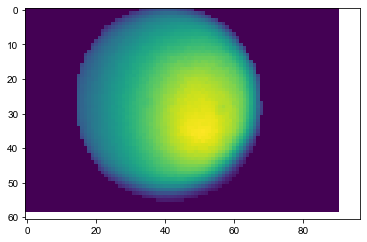

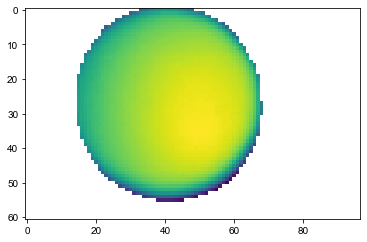

In [18]:

transfert = im / I_480_t

mask_t = skimage.transform.warp(mask, tform)
plt.figure()
plt.imshow(transfert*mask_t)
plt.figure()
plt.imshow(np.log(transfert*mask_t))
plt.savefig('images/transfert_function_690nm' + extension)

## fourier

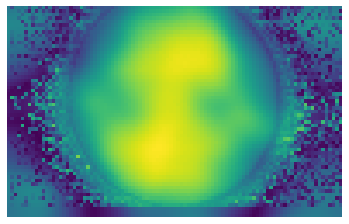

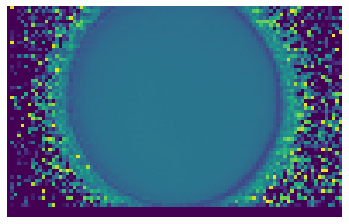

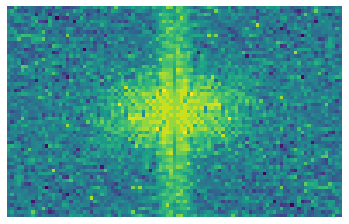

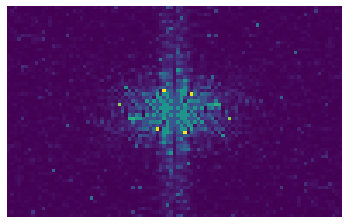

In [56]:
def make_transfert(Icam):
    FIcam = fft2(Icam)
    FI0 = FIcam/transfert_fourier
    I0 = ifft2(FI0)
    return np.abs(I0)

def crop_outliers(X, q1=0.01, q3=0.99):

    Q1 = np.quantile(X, q1)
    Q3 = np.quantile(X, q3)
    X[X<Q1]=Q1
    X[X>Q3]=Q3
    return X


iF0 = 1/fft2(I_480_t)
FIcam = fft2(im_ref)
transfert_fourier = crop_outliers(FIcam*iF0, 0.01, 0.99)



plt.figure()
plt.axis("off")
plt.imshow(make_transfert(im_ref))
plt.figure()
plt.axis("off")
plt.imshow(I_480_t)

plt.figure()
plt.axis("off")
plt.imshow(fftshift(np.log(np.abs(transfert_fourier))))
plt.figure()
plt.axis("off")
plt.imshow(fftshift(np.abs(transfert_fourier)))

In [52]:
mean_480 = []

for i in range(9):
    im = downscale_local_mean(images[i], (10, 10))
    v = im/transfert*mask
    v[v==0]=np.quantile(v, 0.75)
    mean_480.append(np.mean(im[mask]))
    if False:
        plt.figure()
        plt.imshow(v)

mean_480 =np.array(mean_480)

NameError: name 'transfert' is not defined

In [ ]:
images = glob.glob(folder_BLUE + "/images.npy")[0]
images = np.load(images)
voltages = glob.glob(folder_BLUE + "/voltage.npy")[0]
voltages = np.load(voltages)

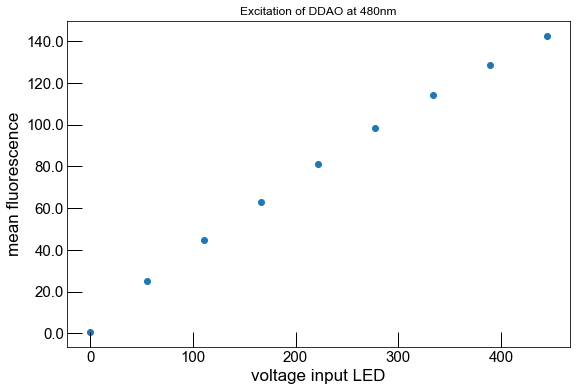

In [15]:
fig = p.set_figure("%d", "%0.1f")
plt.scatter(voltages[:-1], mean_480)
plt.xlabel("voltage input LED")
plt.ylabel("mean fluorescence")
plt.title("Excitation of DDAO at 480nm")

plt.savefig("images/excitation_ddao_480_various_intensities" + extension)

0.0 -147.56708442133518
55.55555555555556 1248.7654828825287
111.11111111111111 2554.239127461408
166.66666666666669 3771.228451633171
222.22222222222223 4901.969701356112
277.77777777777777 5948.560766228957
333.33333333333337 6912.961179490858
388.8888888888889 7796.992118021385
444.44444444444446 8602.33640234055


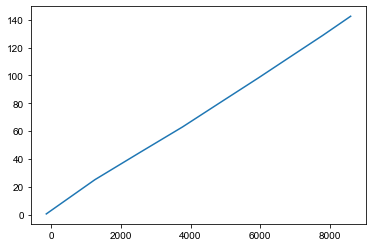

In [16]:
V = VoltageIntensity(folder = glob.glob("*_bode_diagram*")[0])


def dict_to_func(dict_amplitude):
    x = []
    y = []
    for k in dict_amplitude.keys():
        x.append(k)
        y.append(dict_amplitude[k])
    x = np.array(x)
    y = np.array(y)
    func = get_affine_func(x, y)
    return func
    
def amp_to_eins(dict_amplitude, amplitude, lbd):
    #ref: https://fr.wikipedia.org/wiki/Einstein_(unit%C3%A9_de_mesure)
    func = dict_to_func(dict_amplitude)
    power = func(amplitude)
    eins=power*1e-3*1e3*lbd/120/S
    
    return eins

blues = []
for i in range(9):
    intensity_blue = V.get_intensity_voltage("blue", 0.5, voltages[i]/100) * dronpa_480 / ( V.get_intensity_voltage("blue", 0.5, 400/100))
    print(voltages[i], intensity_blue)
    blues.append(intensity_blue)
plt.plot(blues, mean_480)
blues = np.array(blues)


# RED

In [17]:
spectrum

,Unnamed: 0,wavelength (nm) MyLabel,fluorescence at 800 nm MyLabel
0,0,600,731.219849
1,1,601,782.193237
2,2,602,861.813200
3,3,603,916.890300
4,4,604,955.479858
...,...,...,...
116,116,716,14305.058600
117,117,717,14301.409200
118,118,718,13858.860000
119,119,719,13912.372100


In [61]:
spectrum = pd.read_csv("2022-05-12_12_18_excitation_spectrum_690_DDAO.csv")
#spectrum = pd.read_csv("2022-06-24_14_26_fluorescence_spectrum_800_DDAO.csv")
#spectrum = pd.read_csv("DDAO/exc_300-660_em_690.txt", sep = "\t")
i,j=1, 2
headers = spectrum.keys()
spectrum.plot(x = headers[i], y = headers[j])
wavelength = np.array(spectrum[headers[i]])
fluo = np.array(spectrum[headers[1]])


FileNotFoundError: [Errno 2] No such file or directory: '2022-05-12_12_18_excitation_spectrum_690_DDAO.csv'

In [19]:
voltages

array([  0.        ,  55.55555556, 111.11111111, 166.66666667,
       222.22222222, 277.77777778, 333.33333333, 388.88888889,
       444.44444444, 500.        ])

In [20]:
val_tot = {}
val_mppc = {}

0.25
[850560.5]
intensity predicted 579.0950072070101
intensity MPPC 741.1802918625576


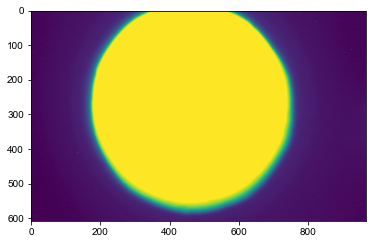

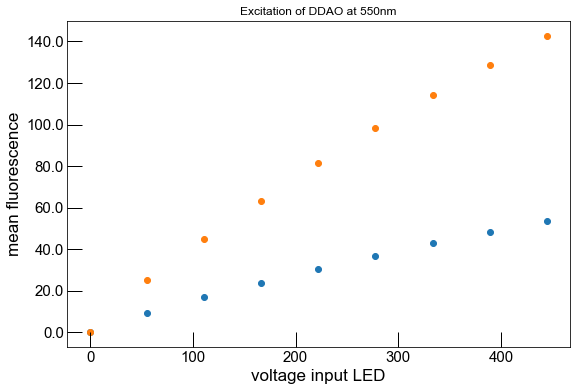

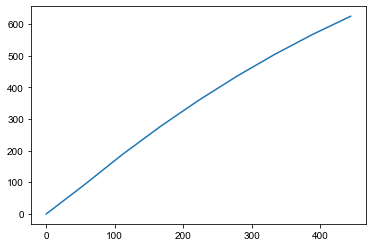

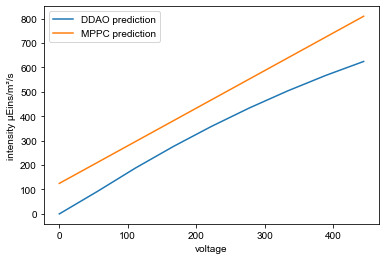

In [37]:
lbd =550

f = folder_GREEN
dic = dict_green



images = glob.glob(f + "/images.npy")[0]
images = np.load(images)
voltages = glob.glob(f + "/voltage.npy")[0]
voltages = np.load(voltages)

im = np.sum(images, axis = 0)
n=150
im[im>n] = n
plt.imshow(im)

mean_640 = []

for i in range(9):
    im = downscale_local_mean(images[i], (10, 10))
    v = im/transfert*mask
    v[v==0]=np.quantile(v, 0.75)
    mean_640.append(np.mean(im[mask]))
    if False:
        plt.figure()
        plt.imshow(v)
mean_640 = np.array(mean_640)

fig = p.set_figure("%d", "%0.1f")
plt.scatter(voltages[:-1], mean_640)
plt.scatter(voltages[:-1], mean_480)
plt.xlabel("voltage input LED")
plt.ylabel("mean fluorescence")
plt.title("Excitation of DDAO at %dnm"%lbd)

plt.savefig("images/excitation_ddao_%d_various_intensities"%lbd + extension)

S = 0.25#*(d0/d1)**2
print(S)

fluo = np.array(spectrum[headers[2]])
print(fluo[wavelength == lbd])
reds = blues * mean_640/mean_480 * fluo[wavelength == 480]/fluo[wavelength == lbd]
plt.figure()
plt.plot(voltages[:-1], reds)

func = get_polyfit_func(voltages[:-1], reds, 2)

print("intensity predicted", func(400))
print("intensity MPPC", amp_to_eins(dic, 400, lbd))

plt.figure()
plt.plot(voltages[:-1], reds, label = "DDAO prediction")
plt.plot(voltages[:-1], amp_to_eins(dic, voltages[:-1], lbd), label = "MPPC prediction")
plt.xlabel("voltage")
plt.ylabel("intensity µEins/m²/s")
plt.legend()

val_tot[lbd] = reds
val_mppc[lbd] = amp_to_eins(dic, voltages[:-1], lbd)

In [38]:
im.max()

91.84

In [22]:
dic = {}
for i in range(1, len(voltages[1:])):
    dic[voltages[i]] = val_tot[640][i]
dic

{55.55555555555556: 123.75621544926872,
 111.11111111111111: 261.73492627572074,
 166.66666666666669: 397.22242859145007,
 222.22222222222223: 528.3906619631629,
 277.77777777777777: 654.6019960308844,
 333.33333333333337: 776.5512283525172,
 388.8888888888889: 892.7605465850573,
 444.44444444444446: 1003.3106480099078}

NameError: name 'val_tot' is not defined

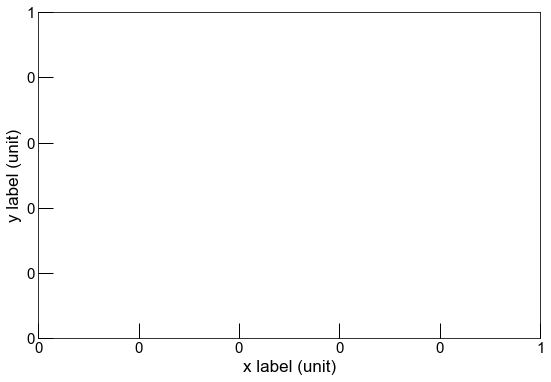

In [88]:
dasa_values = np.load("DASA_values.npy")

w = 0.20
for k in [480, 550, 640]:
    fig = p.set_figure("%d", "%d")
    for i, val in enumerate(val_tot[k][1:-1]):
        plt.bar(i,  val, align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "blue", label = "DDAO read out")
        plt.bar(i+w,  val_mppc[k][i+1], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "k", label = "MPPC read out")
        plt.xlabel("LED voltage input (V)")
        plt.ylabel("intensity (µEins/m²/s)")
        if k==640:
            plt.bar(i+2*w,  dasa_values[i], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "r", label = "DASA1 prediction")
            
        if i==0:
            plt.legend(prop ={"size":13})
        ax = plt.gca()    
        ax.set_xticklabels(voltages[0:-1].astype(int))
        
    print((val -  val_mppc[k][i+1])/val*100)
    plt.savefig("images/compare_DDAO_LED_%d.png"%k)


## Heterogeneity auto-test blue

In [24]:
images = glob.glob(folder_BLUE+ "/images.npy")[0]
images = np.load(images)
voltages = glob.glob(folder_BLUE + "/voltage.npy")[0]
voltages = np.load(voltages)

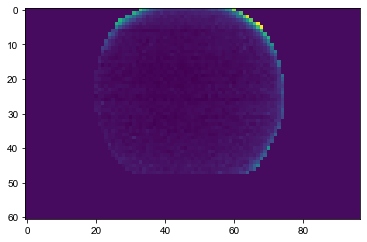

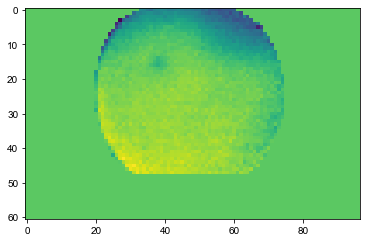

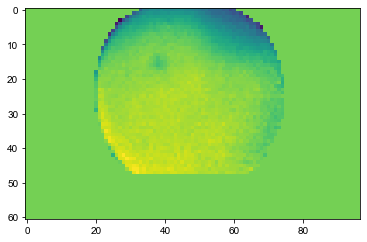

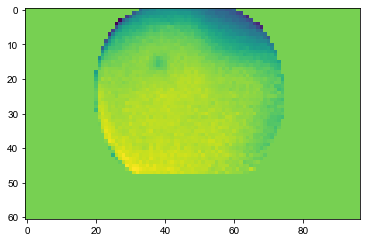

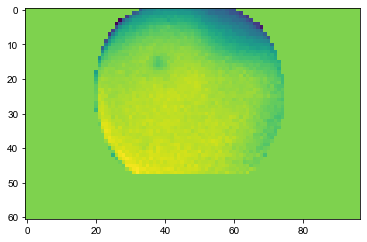

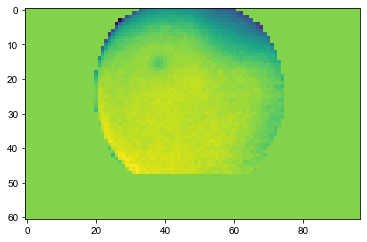

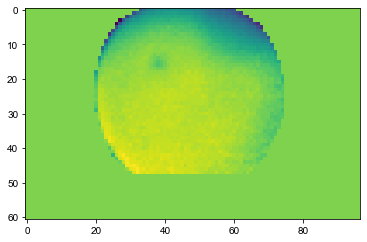

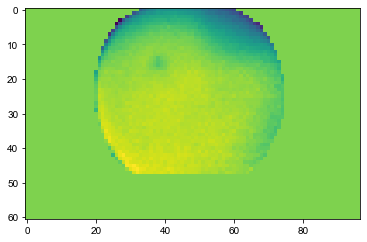

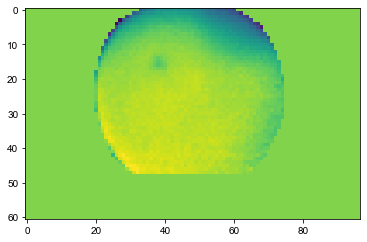

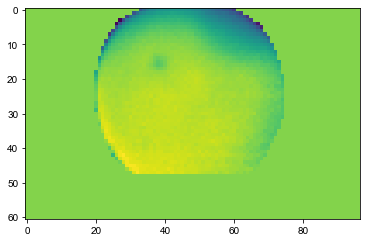

In [25]:
for image in images:
    plt.figure()
    im = downscale_local_mean(image, (10, 10))
    v = im/transfert*mask_t
    v[v==0] = np.quantile(v, 0.75)
    plt.imshow(v)

## Fourier

In [26]:
for image in images:
    plt.figure()
    im = downscale_local_mean(image, (10, 10))
    im = prepare_input(im, maskim)
    
    v = make_transfert(im)
    v = v#*mask_t
    v[v==0] = np.quantile(v, 0.75)
    plt.imshow(v)

NameError: name 'prepare_input' is not defined

<Figure size 432x288 with 0 Axes>

## Heterogeneity red

In [27]:
images = glob.glob(folder_RED+ "/images.npy")[0]
images = np.load(images)
voltages = glob.glob(folder_RED + "/voltage.npy")[0]
voltages = np.load(voltages)

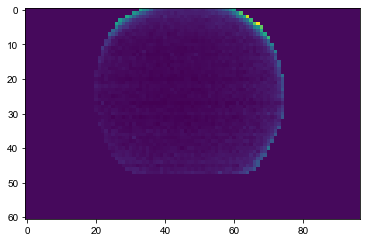

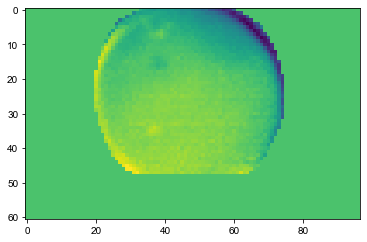

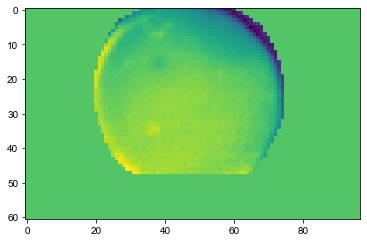

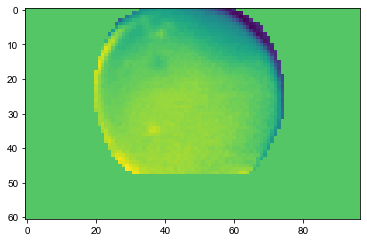

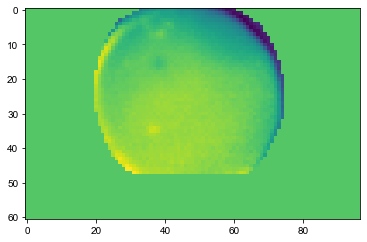

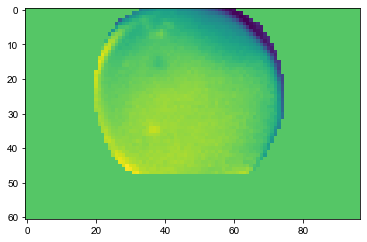

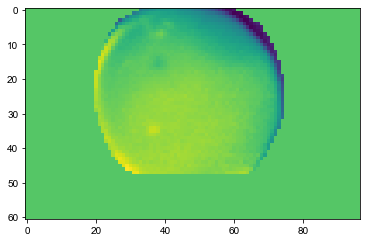

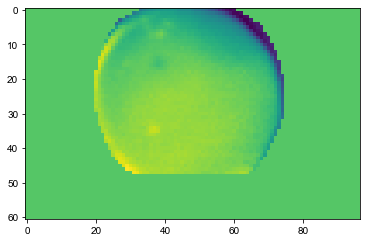

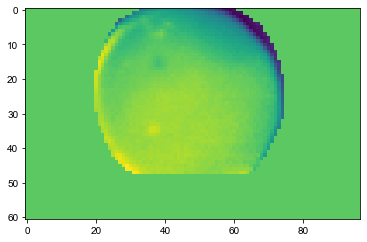

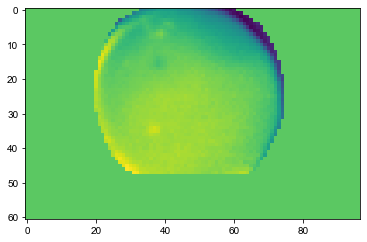

In [28]:
for image in images:
    plt.figure()
    im = downscale_local_mean(image, (10, 10))
    #plt.imshow(im)
    v = im/transfert*mask_t
    v[v==0] = np.quantile(v, 0.75)
    plt.imshow(v)
    plt.savefig("images/airy_red_LED"+ extension)

In [29]:
I_pred = {}

I_pred[480] = [1309.4976988220938,
1317.3731364297646,
1301.9565441883394,
1309.6075482632023,
1311.8444326788847,
1313.1775606621388,
1317.8293676380117,
1313.4458370737232,
1320.1055592967723,
1312.6160746104179,
1312.515751033852,
1315.5853840970924,
1316.6146549423572,
1310.288781174855,
1321.6017446262456]   
    
    
    
    
I_pred[550] = [1165.1685313687815,
1164.2131618906267,
1171.67204214475,
1174.8803918005888,
1170.7214910329135,
1168.2734147526776,
1171.5753246946765,
1169.2246624015072,
1175.0043195009614,
1171.020912960722,
1173.8696434575045,
1171.0781430443935,
1173.4644409000928,
1173.9982511486949,
1171.833644462479]

I_pred[640] = [1080.7564077031004,
1072.9113943355078,
1078.271978283781,
1077.6316612156404,
1076.3009249639238,
1074.5581395720585,
1074.5870874731067,
1076.9532811022266,
1073.353031346186,
1071.7973324176207,
1071.649249667264,
1072.5094950360008,
1073.9139710673744,
1070.6921596498364]

I_leaf = {}
I_leaf[480] = [1236, 1251, 1110]
I_leaf[550] = [658]
I_leaf[640] = [1250]


I_algae = {}
I_algae[480] = [1247]
I_algae[550] = [788]
I_algae[640] = [485]



In [30]:
wave = np.array([480, 550, 640])
MPPC = np.array([72.9, 50.6, 36.4])
MPPC_int = MPPC*wave/0.25/120
MPPC_int

array([1166.4       ,  927.66666667,  776.53333333])

In [86]:
plt.figure()
w = 0.20
for i, k in enumerate(list(I_pred.keys())):
    plt.bar(i,  np.mean(I_pred[k]) , yerr=np.std(I_pred[k]), align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "blue")
    plt.bar(i+w,  MPPC_int[i], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "k")
    plt.bar(i+2*w, I_algae[k], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "red")



NameError: name 'I_pred' is not defined

<Figure size 432x288 with 0 Axes>

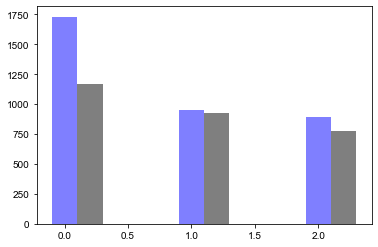

In [32]:
wave = np.array([480, 550, 640])
volt=np.array([60, 400, 400])
MPPC = np.array([72.9, 50.6, 36.4])
MPPC_int = MPPC*wave/0.25/120
DDAO_pred = np.array([1730, 950 , 893 ])
DDAO_int = np.array([5.91, 20 , 29])

plt.figure()
w = 0.20
for i, k in enumerate(list(I_pred.keys())):
    plt.bar(i,  DDAO_pred[i], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "blue")
    plt.bar(i+w,  MPPC_int[i], align='center', alpha=0.5, ecolor='black', capsize=10, width=w, color = "k")
